# Coding Dojo Working Notebook: Plotting Jet Kinematic Variables

## Jet Basics
<!-- Quick explanation of what jets are and any other relevant information about them -->

## Setup

If you do not already have the data, go back to your terminal and do so. (Hint: Look up what `wget` does and how it works.)

## Instructions
For AK4 jets, plot histograms for each of the kinematic variables using the tools specified in the following table.

<table>
  <tr>
    <th>AK4 Jet Kinematic Variable</th>
    <th>Tools to Plot With</th>
  </tr>
  <tr>
    <td>Jet eta</td>
    <td>PyROOT</td>
  </tr>
  <tr>
    <td>Jet phi</td>
    <td>RDataFrame</td>
  </tr>
  <tr>
    <td>Jet pt</td>
    <td>Uproot, Hist</td>
  </tr>
  <tr>
    <td>Jet mass</td>
    <td>Matplotlib</td>
  </tr>
</table>

If you finish before time is up, there is an extra exercise

## Hints:
1. Check the content of data.root (e.g. What is the name of the TTree?)
    - The file contains multipe TTrees
    - Only the **first** one is relavent to this exercise
2. Check the content of TTree (e.g. What branches does TTree have? What is the branch name of the quantity that we want to plot?)
3. Fill a histogram using the branch and draw

In [1]:
# check the content of data.root
!rootls data.root

Events  LuminosityBlocks  MetaData  ParameterSets  Runs  tag


## `PyROOT` for AK4 Jet $\eta$

**To-do**: Plot a histogram for jet  using PyROOT

**Link to PyROOT tutorials**: https://github.com/Ari-mu-l/software-carpentry

Import relavent package(s)

In [2]:
import ROOT

Welcome to JupyROOT 6.26/11


Read the ROOT File

In [3]:
file = ROOT.TFile.Open("data.root")

Load the Tree from the ROOT file (Use the name of the first TTree from the step "check the content of data.root")

In [4]:
tree = file.Get("Events")

Check the branch names of the ttree and select the desired branch (jet eta)

- Hint1: Use the Print() function

- Hint2: We often act on an object with the format of <object>.<some function> like hist.Draw()

- Hint3: If you cannot figure it out, try to google for answers!

In [5]:
tree.Print()

******************************************************************************
*Tree    :Events    : Events                                                 *
*Entries :   107505 : Total =       604094767 bytes  File  Size =  138372690 *
*        :          : Tree compression factor =   4.36                       *
******************************************************************************
*Br    0 :run       : run/i                                                  *
*Entries :   107505 : Total  Size=     431973 bytes  File Size  =       3722 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 115.88     *
*............................................................................*
*Br    1 :luminosityBlock : luminosityBlock/i                                *
*Entries :   107505 : Total  Size=     432237 bytes  File Size  =       4054 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 106.45     *
*...................................................

Create a canvas to plot the histogram

In [6]:
canvas = ROOT.TCanvas("canvas", "Jet_eta", 800, 600)

Create an empty Histogram to plot the AK4 Jet $\eta$ 

- Requirement: Range from -6 to 6. Split into 100 bins.

In [7]:
hist = ROOT.TH1F("Jet #eta", "Jet #eta", 100, -6, 6)

Fill the histogram with the branch in TTree

- The code has been written for you.

- Read the code and explain what each line is doing with the help of the documentation: https://root.cern.ch/doc/master/classTTree.html . If it doesn't contain everything you need, use google.

Write it down in this cell (double click to edit) or leave comments in the code:

In [8]:
nEntries = tree.GetEntries()

for i in range(nEntries):
    if(tree.GetEntry(i)>0):
        for j in range(len(tree.Jet_eta)): # Loop through all the jets in each event
             hist.Fill(tree.Jet_eta[j])

Draw the Histogram and the Canvas

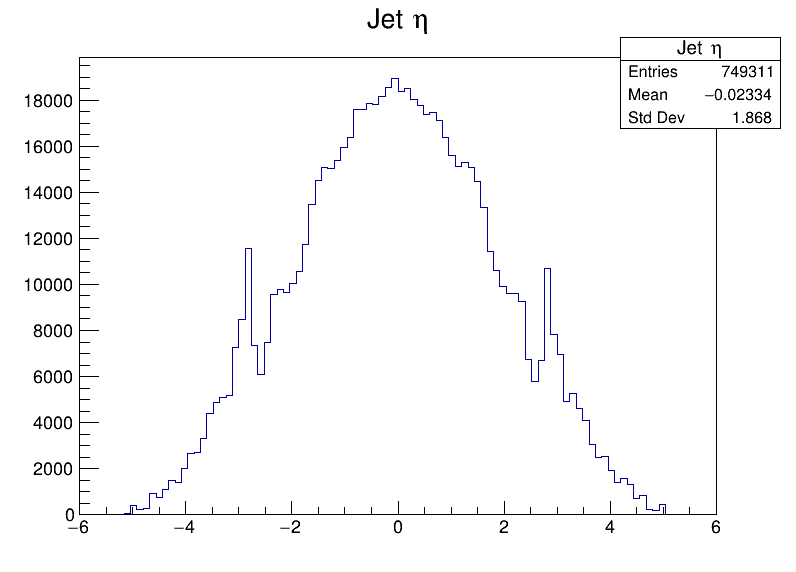

In [9]:
hist.Draw()
canvas.Draw()

You will find that looping through every event to fill the histogram is slow.

Here is a cool shortcut that replaces everything above:

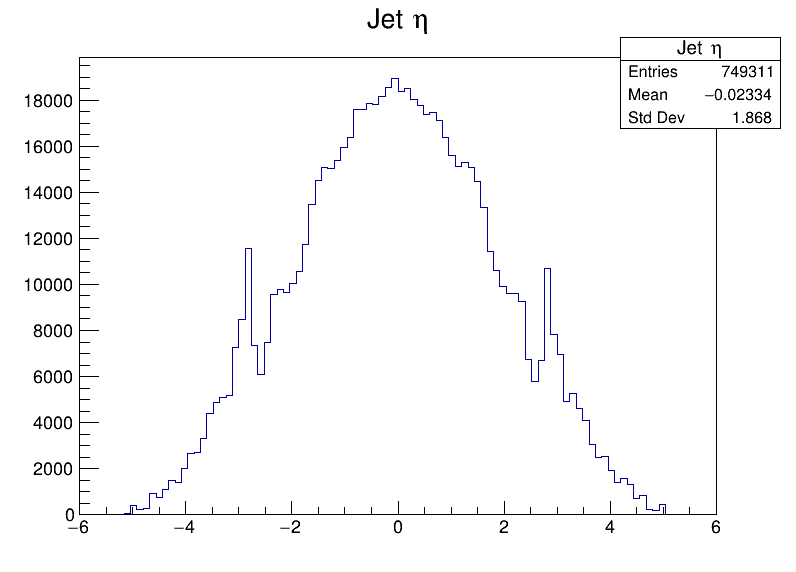

In [10]:
tree.Draw("Jet_eta >> Jet #eta")
canvas.Draw()

## `RDataFrame` for AK4 Jet $\phi$

**To-do**: Plot the distribution of jet $\phi$

**Requirement**: the histogram should range from -2 to 2 and have 10 bins

**Documentation** of relavent functions: https://root.cern/doc/master/classROOT_1_1RDataFrame.html

Import relavent package (hint: ROOT)

In [11]:
import ROOT

Load TTree into a RDataFrame (aka create a RDataFrame with the content in TTree)

In [12]:
df = ROOT.RDataFrame("Events","data.root")

Check the column names

In [13]:
print(df.GetColumnNames())

{ "CaloMET_phi", "CaloMET_pt", "CaloMET_sumEt", "ChsMET_phi", "ChsMET_pt", "ChsMET_sumEt", "CorrT1METJet_area", "CorrT1METJet_eta", "CorrT1METJet_muonSubtrFactor", "CorrT1METJet_phi", "CorrT1METJet_rawPt", "DeepMETResolutionTune_phi", "DeepMETResolutionTune_pt", "DeepMETResponseTune_phi", "DeepMETResponseTune_pt", "Electron_charge", "Electron_cleanmask", "Electron_convVeto", "Electron_cutBased", "Electron_cutBased_HEEP", "Electron_dEscaleDown", "Electron_dEscaleUp", "Electron_dEsigmaDown", "Electron_dEsigmaUp", "Electron_deltaEtaSC", "Electron_dr03EcalRecHitSumEt", "Electron_dr03HcalDepth1TowerSumEt", "Electron_dr03TkSumPt", "Electron_dr03TkSumPtHEEP", "Electron_dxy", "Electron_dxyErr", "Electron_dz", "Electron_dzErr", "Electron_eCorr", "Electron_eInvMinusPInv", "Electron_energyErr", "Electron_eta", "Electron_hoe", "Electron_ip3d", "Electron_isPFcand", "Electron_jetIdx", "Electron_jetNDauCharged", "Electron_jetPtRelv2", "Electron_jetRelIso", "Electron_lostHits", "Electron_mass", "Elect

Fill a histogram with the desired branch
Requirement: the histogram should range from -2 to 2 and have 10 bins

In [14]:
h_phi = df.Histo1D(("Jet #phi", "Jet #phi", 10, -2, 2), "Jet_phi")

Plot histogram

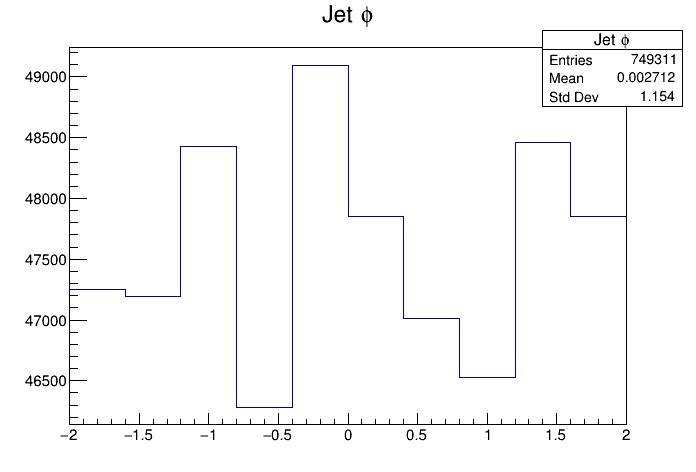

In [15]:
c = ROOT.TCanvas()
h_phi.Draw()
c.Draw()

## `Hist` for Jet $p_T$

In [16]:
import uproot, hist
import awkward as ak

Load the data.root file with uproot

In [17]:
data = uproot.open("data.root")

Find Jet_pt info in "Events" TTree. Save them in an array with ak library

In [18]:
jet_pt = data['Events']['Jet_pt'].array(library="ak")

Flatten the array

In [19]:
flat_jet_pt = ak.flatten(jet_pt)

Import Hist. Define a histogram, fiil it and plot it

/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-pac

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f794bb969a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

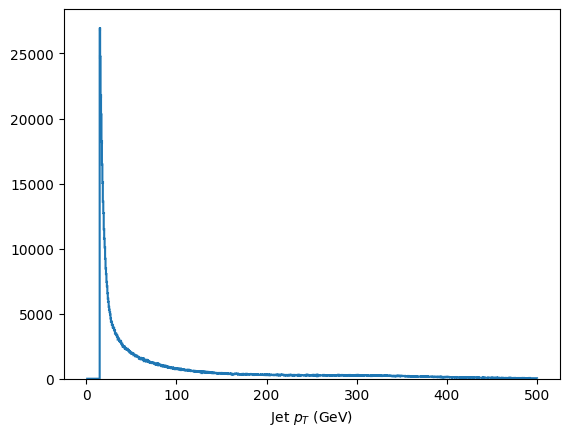

In [20]:
from hist import Hist

hist = Hist.new.Reg(1000, 0, 500, name="Jet_pt", label="Jet $p_T$ (GeV)").Double()
hist.fill(flat_jet_pt)
hist.plot()

## `Matplotlib` for AK4 Jet mass

This is probably the longest method of making plots with our data. So we've provided detailed instructions and starter code. 

Reuse the code from the Hist section i.e. :

1. Open the file with uproot
2. Get the `Jet_mass` branch and get the awkard array.
3. Make the histogram by flattening and using `<myhist>.fill()`. *However this time do not use `<myhist>.plot()`*.

`Hist` calls `matplotlib.pyplot` internally and allows you to make quick plots. Now that you were able to plot the histogram with hist objects in the past section, it is your turn to make it look pretty.

**To Do**

Instead of using the `hist.Hist.plot1d()` to plot the histogram we are going to use the `<myhist>.to_numpy()` to get the bin edges and bin contents like `np.histogram()` would normally return.

**Requirements**:

1. Make the histogram filled with red color
1. Add a legend
1. Set the y-scale to "log"
1. Add a title at the top of the plot that says "Jet Mass Distribution"
1. Add a label on the x axis that says "Jet Mass [GeV]"
1. Set the words "Count" as the y axis label

**HINT**

Use google for adding stuff in matplotlib. Take this code as a starting point.
```python
# In order to use bin edges from a pre-binned histogram you need to do the following
fig, ax = plt.subplots()
values , edges = <myhist>.to_numpy()
ax.hist(x = edges[:-1], bins = edges, weights = values)
# where values and edges come from the output of <myhist>.to_numpy()

plt.show()
```

**Optional**

If you haven't heard about it try installing `mplhep` with `pip install mplhep` and use the following

```python
import mplhep as hep
hep.style.use("CMS")
```

This will now make your plots look nicer and closer to publication style!

For extra points try to add the *CMS Experiment* label at the top with `mplhep`. (Google is your friend!!)

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import uproot
import hist
import awkward as ak


In [22]:
import mplhep as hep
hep.style.use("CMS")

In [23]:
file = uproot.open("data.root")
file.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [24]:
events = file['Events']
jet_mass = events['Jet_mass'].array()

In [25]:
masshist = hist.Hist(
    hist.axis.Regular(120,0,160,label='Jet mass', name = 'mass')
)
masshist.fill(ak.ravel(jet_mass))

Hist(Regular(120, 0, 160, name='mass', label='Jet mass'), storage=Double()) # Sum: 749279.0 (749311.0 with flow)

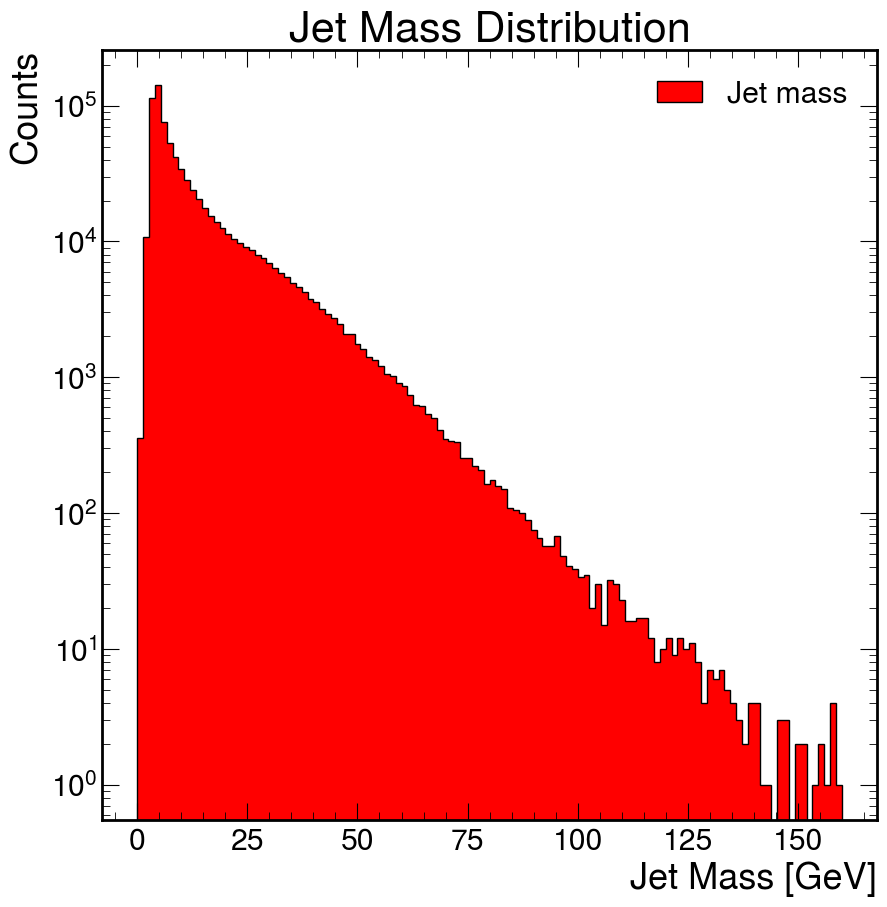

In [26]:
fig, ax = plt.subplots()
values , edges = masshist.to_numpy()
# In order to use bin edges from a pre-binned histogram you need to do the following
ax.hist(x = edges[:-1], bins = edges, weights=values,
        label = 'Jet mass',
        color='red',
        histtype = 'stepfilled',
        log = True,
        edgecolor= 'black'
        )
ax.set_title("Jet Mass Distribution")
ax.set_xlabel("Jet Mass [GeV]")
ax.set_ylabel("Counts")
ax.legend()
plt.show()